In [1]:
from __future__ import print_function

import keras

Using TensorFlow backend.


In [2]:
# keras can be update with `pip install -U keras`
print(keras.__version__)

2.0.0


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


batch_size = 128
num_classes = 10
#epochs = 20
epochs = 5

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

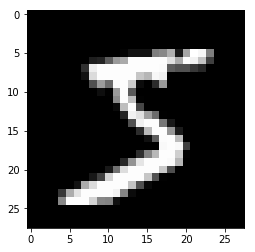

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [8]:
print(y_train[0])

5


In [9]:
print(y_train[:5])

[5 0 4 1 9]


In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
print(y_train[:5])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


#### Build and train a MLP model

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
# Press shift-tab in jupyter to show function parameters

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.2433 - acc: 0.9251 - val_loss: 0.1112 - val_acc: 0.9642

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0720384305038
Test accuracy: 0.98


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

In [19]:
y_pred = model.predict(x_test)

In [21]:
print(y_test[:5])
print(y_pred[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[  6.20205791e-14   9.46920146e-12   2.34968578e-09   3.74018416e-09
    1.02328429e-16   4.17101700e-11   3.84394191e-19   1.00000000e+00
    8.80746051e-13   2.00807510e-10]
 [  1.64641843e-18   1.80183903e-08   1.00000000e+00   8.42506200e-14
    1.05893447e-21   7.47024694e-17   7.11836997e-19   9.88896460e-16
    3.80906111e-16   2.19757453e-21]
 [  4.88164370e-11   9.99981165e-01   2.45225488e-06   2.46806464e-09
    2.52819723e-06   8.87798564e-08   1.85116331e-08   1.13061342e-05
    2.42923920e-06   8.02743982e-10]
 [  9.99446929e-01   6.43762633e-07   5.72086428e-05   1.08152881e-06
    5.47997752e-06   7.47096124e-07   3.16786784e-04   5.80419219e-05
    1.36488495e-06   1.11740432e-04]
 [  2.87599639e-10   3.68385633e-09   1.68857923e-08   1.11619811e-11
    9.

In [28]:
import numpy as np
print('y_pred:', np.argmax(y_pred[:5], axis=1))
print('y_test:', np.argmax(y_test[:5], axis=1))

y_pred: [7 2 1 0 4]
y_test: [7 2 1 0 4]


#### Build and train a CNN model

In [37]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [46]:
batch_size = 128
num_classes = 10
#epochs = 12
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [43]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 145s - loss: 0.2102 - acc: 0.9381 - val_loss: 0.0747 - val_acc: 0.9767

In [51]:
#Trains a simple convnet on the MNIST dataset.
#Gets to 99.25% test accuracy after 12 epochs
#(there is still a lot of margin for parameter tuning).
#16 seconds per epoch on a GRID K520 GPU.

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0500774755606
Test accuracy: 0.9836
